In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:99% !important;}</style>"))

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [ ]:
# hands = ('h', 'm', 's')
# points = np.array([[-55,-77], [50,-45], [-60,60]])
# center = points.mean(axis=0)
# print 'Image Coords:'
# print points #np.vstack([points, center])

# points = points - center
# center = np.array([0,0])
# print '\nCenter Coords:'
# print points #np.vstack([points, center])

# r = np.sqrt(np.sum(points**2, axis=1))
# print '\nL2 norms:'
# print r

In [ ]:
# # Reverse Y for image:array transform. Only for plotting.
# p = points * [1, -1]

# plt.scatter(*p.T, s=1, c='k', label='Endpoints')
# plt.scatter(*center.T, marker='o', facecolor='none', edgecolor='k', label='Center')
# for (x,y),h in zip(p, hands):
#     plt.text(x, y, h)
#     plt.plot([center[0],x], [center[1],y])
# plt.axis('scaled')
# plt.legend(); plt.show()

In [ ]:
# theta_rad = np.arctan(points[:,1]/points[:,0])
# theta_rad2 = np.arctan2(points[:,1], points[:,0])
# print 'atan  (radians): ', theta_rad
# print 'atan2 (radians):', theta_rad2

In [ ]:
# orientation = 0

# # +270 degrees for math --> clock convention
# theta_deg = theta_rad * 180/np.pi + 270 + orientation
# print 'Naive angle (degrees):', theta_deg

# time = theta_deg / (30, 6, 6)
# print 'Naive time:', time

In [ ]:
# # Rotate theta[i] 180 degrees if sign(atan[i]) == sign(atan2[i]).
# # Modulo 360 for overflow. I could -1*x, y points, but adding
# # 180 degrees to offending thetas works fine here. 
# arctans_are_same = np.sign(theta_rad) == np.sign(theta_rad2) 
# rotate180 = arctans_are_same * 180

# theta_deg = (theta_deg + rotate180)%360
# print 'Modifed angle (degrees):', theta_deg

# time = theta_deg / (30, 6, 6)
# print 'Modified time:', time

In [ ]:
# hour, minute, second = time
# hour = int(hour)
# minute = int(np.ceil(minute))
# second = int(np.ceil(second))

# time_str = '{}:{}:{} AM/PM'.format(hour, minute, second)
# print 'TIME:', time_str

In [3]:
def NormalizePoints(points):
    '''Assumes points are of form np.array([[-55,-77], [50,-45], [-60,60]])
    and shortest-longest hands are of order (h, m, s) (array is not necessarily 
    in order, however). Takes points, returns sorted points with reference 
    point as center of points'''
    
    points = points - points.mean(axis=0)
    center = np.array([0,0])
    
    # Order hands shortest-longest == (h, m, s). L2 norm.
    r = np.sqrt(np.sum(points**2, axis=1))
    points = points[r.argsort()]
    
    return points, center, r

In [4]:
def Lines2Time(points, orientation=0):
    '''Assumes points are of form np.array([[-55,-77], [50,-45], [-60,60]])
    and shortest-longest hands are of order (h, m, s) (array is not 
    necessarily in order, however).'''
    
    points, center, r = NormalizePoints(points)
    
    theta_rad = np.arctan(points[:,1]/points[:,0])
    theta_rad2 = np.arctan2(points[:,1], points[:,0])
    
    # +270 degrees for math --> clock convention
    theta_deg = theta_rad * 180/np.pi + 270 + orientation
    
    # Rotate theta[i] 180 degrees if sign(atan[i]) == sign(atan2[i]).
    # Modulo 360 for overflow. I could -1*x, y points, but adding
    # 180 degrees to offending thetas works fine here. 
    arctans_are_same = np.sign(theta_rad) == np.sign(theta_rad2) 
    rotate180 = arctans_are_same * 180

    theta_deg = (theta_deg + rotate180)%360
    time = theta_deg / (30, 6, 6)
    
    hour, minute, second = time.astype(int)
    #hour = int(hour)
    #minute = int(np.ceil(minute))
    #second = int(np.ceil(second))
    time_str = '{}:{}:{} AM/PM'.format(hour, minute, second)
    
    return time, time_str

In [241]:
def PlotPoints(points, title='', figsize=(5,5), **kwargs):
    '''Assumes points are of form np.array([[-55,-77], [50,-45], [-60,60]])
    and shortest-longest hands are of order (h, m, s) (array is not 
    necessarily in order, however).'''

    hands = ('h', 'm', 's')
    points, center, r = NormalizePoints(points)
    
    # Draw clock circumference
    dcircle = 1.05
    fig = plt.figure(figsize=figsize)
    circle = plt.Circle(center, r.max()*dcircle,  fill=False, color='grey')#, linestyle=':')
    fig.gca().add_artist(circle)
    
    # Draw hour, minute markers
    markerlengths = (0.15, 0.05)
    dtexts = (0.9, 0.95)
    for i in range(1,13):
        angle = i * np.pi/180 * 30 
        x1 = r.max()*dcircle * np.cos(angle)
        y1 = r.max()*dcircle * np.sin(angle)
        x0 = (1-markerlengths[0]) * x1
        y0 = (1-markerlengths[0]) * y1
        plt.text(y0*dtexts[0], x0*dtexts[0], i, ha='center', va='center', fontsize=20)
        plt.plot([x0,x1], [y0,y1], c='grey')#, linestyle=':')
    for i in range(60):
        if i%5:
            angle = i * np.pi/180 * 6
            x1 = r.max()*dcircle * np.cos(angle)
            y1 = r.max()*dcircle * np.sin(angle)
            x0 = (1-markerlengths[1]) * x1
            y0 = (1-markerlengths[1]) * y1
            plt.text(y0*dtexts[1], x0*dtexts[1], i, ha='center', va='center', fontsize=10)
            plt.plot([x0,x1], [y0,y1], c='grey')#, linestyle=':')
    '''
    # Show minute, hour markers:
    for i in range(60):
        if i%5:
            continue
            print(i)
            d = 0.95
            angle = i * np.pi/180 * 6
            x1 = r.max()*dc * np.cos(angle)
            y1 = r.max()*dc * np.sin(angle)
            x0 = d * x1
            y0 = d * y1
            plt.plot([x0,x1], [y0,y1], c='grey')#, linestyle=':')
        else:
            d = 0.85
            angle = i * np.pi/180 * 30 
            x1 = r.max()*dc * np.cos(angle)
            y1 = r.max()*dc * np.sin(angle)
            x0 = d * x1
            y0 = d * y1
            plt.plot([x0,x1], [y0,y1], c='grey')#, linestyle=':')
    '''
    
    # Draw hands (what we came for)
    # Reverse Y for image:array transform. Only for plotting.
    p = points * [1, -1]
    #plt.scatter(*p.T, s=1, c='k', label='Endpoints')
    #plt.scatter(*center.T, marker='o', facecolor='none', edgecolor='grey', label='Center')
    for (x,y),h in zip(p, hands):
        #plt.text(x*0.5, y*0.5, h, fontsize=20)
        #plt.plot([center[0],x], [center[1],y], lw=5, label=h)
        #plt.plot([center[0],x], [center[1],y], lw=1, color='k', zorder=11)
        if h != 's':
            plt.arrow(*center.T, x, y, width=5, head_width=5, length_includes_head=False, color='k', zorder=10)
            plt.arrow(*center.T, x, y, width=4, head_width=4, length_includes_head=True, color='w', zorder=10)
        else:
            plt.arrow(*center.T, x, y, width=3, head_width=3, length_includes_head=False, color='k', zorder=10)
            plt.arrow(*center.T, x, y, width=2, head_width=2, length_includes_head=True, color='w', zorder=10)

    plt.scatter(*center.T, marker='o', s=200, edgecolor='k', facecolor='k', zorder=11)

    
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    
    plt.axis('scaled')
    dlims = 1.1
    lims = -r.max()*dlims, r.max()*dlims
    plt.xlim(lims)
    plt.ylim(lims)
    
    #plt.legend()
    plt.show()

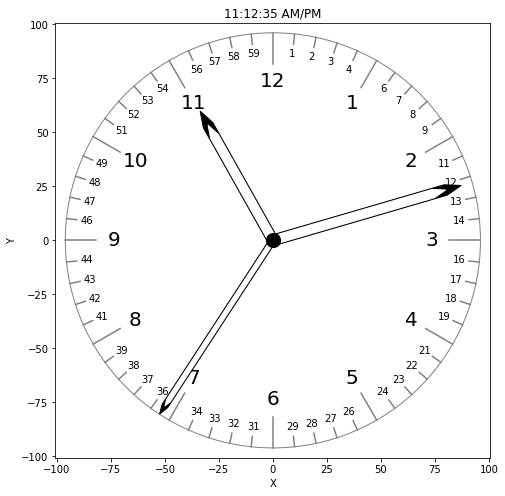

In [242]:
points = np.array([[50,-40], [-60,-70], [-80,60]])

time, time_str = Lines2Time(points)
PlotPoints(points, title=time_str, figsize=(8,8))

In [237]:

def PlotPoints(points, title='', figsize=(5,5), **kwargs):
    '''Assumes points are of form np.array([[-55,-77], [50,-45], [-60,60]])
    and shortest-longest hands are of order (h, m, s) (array is not 
    necessarily in order, however).'''

    hands = ('h', 'm', 's')
    points, center, r = NormalizePoints(points)
    
    # Draw clock circumference
    dcircle = 1.05
    fig = plt.figure(figsize=figsize)
    circle = plt.Circle(center, r.max()*dcircle, color='k')#, linestyle=':')
    fig.gca().add_artist(circle)
    
    # Draw hour, minute markers
    markerlengths = (0.15, 0.05)
    dtexts = (0.9, 0.95)
    for i in range(1,13):
        angle = i * np.pi/180 * 30 
        x1 = r.max()*dcircle * np.cos(angle)
        y1 = r.max()*dcircle * np.sin(angle)
        x0 = (1-markerlengths[0]) * x1
        y0 = (1-markerlengths[0]) * y1
        plt.scatter(x0*0.9, y0*0.9, color='w', s=2500, zorder=100)#, linestyle=':')
        plt.plot([x0,x1], [y0,y1], c='w')#, linestyle=':')
    for i in range(60):
        if i%5:
            angle = i * np.pi/180 * 6
            x1 = r.max()*dcircle * np.cos(angle)
            y1 = r.max()*dcircle * np.sin(angle)
            x0 = (1-markerlengths[1]) * x1
            y0 = (1-markerlengths[1]) * y1
            plt.plot([x0,x1], [y0,y1], c='w')#, linestyle=':')
  
    # Draw hands (what we came for)
    # Reverse Y for image:array transform. Only for plotting.
    p = points * [1, -1]
    #plt.scatter(*p.T, s=1, c='k', label='Endpoints')
    #plt.scatter(*center.T, marker='o', facecolor='none', edgecolor='grey', label='Center')
    for (x,y),h in zip(p, hands):
        #plt.text(x*0.5, y*0.5, h, fontsize=20)
        #plt.plot([center[0],x], [center[1],y], lw=5, label=h)
        if h == 'h':
            plt.arrow(*center.T, x, y, width=10, head_width=10, length_includes_head=True, color='lightgrey', zorder=100)
            plt.arrow(*center.T, x*0.9, y*0.9, width=6, head_width=6, length_includes_head=True, color='ivory', zorder=100)
        elif h == 'm':
            plt.arrow(*center.T, x, y, width=10, head_width=20, length_includes_head=True, color='lightgrey', zorder=100)
            plt.arrow(*center.T, x*0.9, y*0.9, width=5, head_width=12, length_includes_head=True, color='ivory', zorder=100)
        else:
            plt.arrow(*center.T, x, y, width=5, head_width=5, length_includes_head=True, color='lightgrey', zorder=100)
        
    #plt.rcParams["font.family"] = "serif"
    plt.text(0,r.max()*0.45, 'SEIKO', color='w', ha='center', va='center', fontname='serif', fontsize=40, weight="bold", zorder=99)
    plt.text(0,r.max()*0.3, 'AUTOMATIC', color='w', ha='center', va='center', fontsize=15, zorder=99)
    plt.text(0, -r.max()*0.45, 'DIVER\'S 200m', color='orange', ha='center', va='center', fontsize=15, weight="bold", zorder=99)

    
    #rect = Rectangle((r.max()*0.4, -r.max()*0.15), r.max()-r.max()*0.45, r.max()*0.3, linewidth=100, facecolor='w', zorder=99)
    #fig.gca().add_patch(rect)

    rect2 = plt.Polygon([[r.max()*0.4, -r.max()*0.15], [r.max()*0.4, r.max()*0.15], 
                        [r.max()*0.95, r.max()*0.15], [r.max()*0.95, -r.max()*0.15], 
                         ], color='w', zorder=99)
    fig.gca().add_patch(rect2)
    
    tri = plt.Polygon([[-r.max()*0.2,r.max()], [r.max()*0.2,r.max()], [0, r.max()*0.6]], color='w', zorder=990)
    fig.gca().add_patch(tri)

    
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    
    plt.axis('scaled')
    dlims = 1.1
    lims = -r.max()*dlims, r.max()*dlims
    plt.xlim(lims)
    plt.ylim(lims)
    
    #plt.legend()
    plt.show()

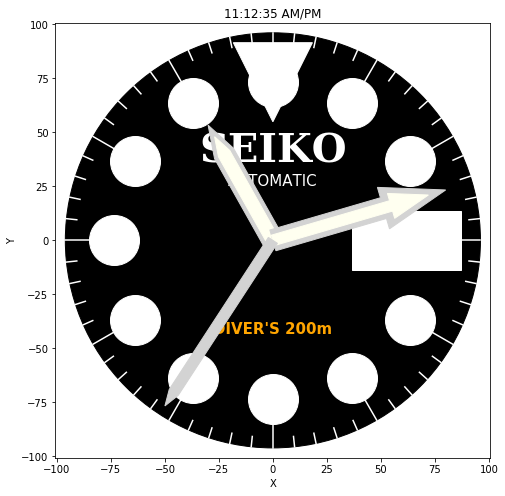

In [238]:
points = np.array([[50,-40], [-60,-70], [-80,60]])

time, time_str = Lines2Time(points)
PlotPoints(points, title=time_str, figsize=(8,8))